In [0]:
##Graphical Exploratory Data Analysis(EDA)

## Empirical Cumulative Distribution Functions(ECDF)

In [0]:
import numpy as np

def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

In [0]:
from sklearn import datasets

In [0]:
iris = datasets.load_iris()

In [0]:
type(iris.data)

numpy.ndarray

In [0]:
def species(flower_val):
    if flower_val == 0:
        return "setosa"
    elif flower_val == 1:
        return "versicolor"
    else: 
        return "virginica"

import pandas as pd

df = pd.DataFrame(np.c_[iris.data, [species(t) for t in iris.target]], columns = ["sepal length", "sepal width", "petal length", "petal width", "species"])

In [0]:
df.shape

(150, 5)

In [0]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width',
       'species'],
      dtype='object')

In [0]:
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null object
sepal width     150 non-null object
petal length    150 non-null object
petal width     150 non-null object
species         150 non-null object
dtypes: object(5)
memory usage: 5.9+ KB


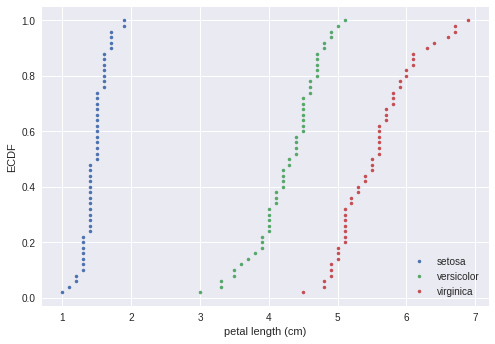

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

setosa_petal_length = df.loc[df["species"]=="setosa", "petal length"].values.astype(float)

versicolor_petal_length = df.loc[df["species"]=="versicolor", "petal length"].values.astype(float)

virginica_petal_length = df.loc[df["species"]=="virginica", "petal length"].values.astype(float)


x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

_ = plt.plot(x_set, y_set, marker=".", linestyle="none")
_ = plt.plot(x_vers, y_vers, marker=".", linestyle="none")
_ = plt.plot(x_virg, y_virg, marker=".", linestyle="none")

plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

plt.show()

[3.3    4.     4.35   4.6    4.9775]


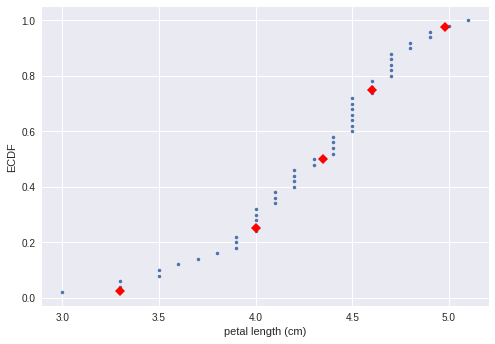

In [0]:
percentiles = np.array([2.5, 25, 50, 75, 97.5])
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)
print(ptiles_vers)

_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle="none")

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


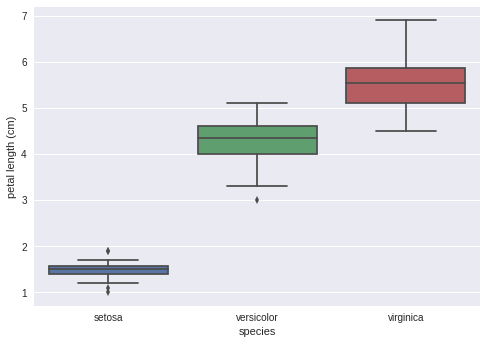

In [0]:
df["petal length"] = df["petal length"].astype(float)
df["petal width"] = df["petal width"].astype(float)
df["sepal length"] = df["sepal length"].astype(float)
df["sepal width"] = df["sepal width"].astype(float)

sns.boxplot(x="species", y="petal length", data = df)

plt.xlabel("species")
plt.ylabel("petal length (cm)")
plt.show()

In [0]:
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

diff_sq = differences ** 2
variance_explicit = np.mean(diff_sq)
variance_np = np.var(versicolor_petal_length)

print(variance_explicit, variance_np)

0.21640000000000004 0.21640000000000004


In [0]:
print(np.sqrt(variance_np))
print(np.std(versicolor_petal_length))

0.4651881339845203
0.4651881339845203


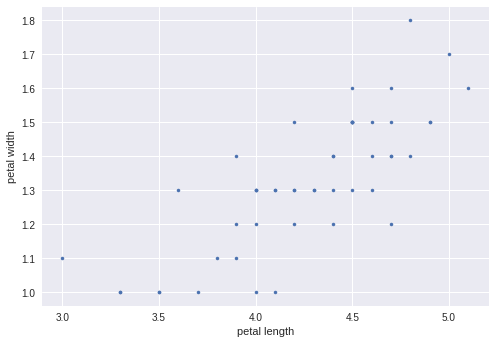

In [0]:
versicolor_petal_width = df.loc[df["species"]=="versicolor", "petal width"].values.astype(float)
plt.plot(versicolor_petal_length, versicolor_petal_width, marker=".", linestyle="none")

plt.xlabel("petal length")
plt.ylabel("petal width")
plt.show()

In [0]:
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)
print(covariance_matrix)

petal_cov = covariance_matrix[0, 1]
print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


In [0]:
##Pearson coefficient
def pearson_r(x, y):
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0,1]

r = pearson_r(versicolor_petal_length, versicolor_petal_width)
print(r)

0.7866680885228169


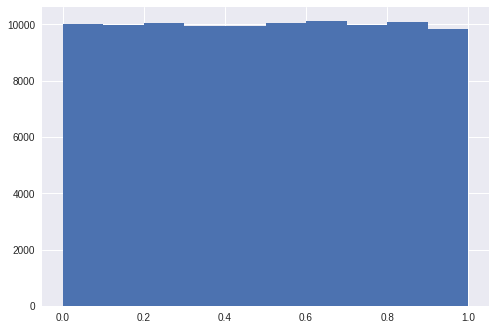

In [0]:
np.random.seed(42)
random_numbers = np.empty(100000)

for i in range(100000):
    random_numbers[i] = np.random.random()

_ = plt.hist(random_numbers)
plt.show()

In [0]:
##Probability Distribution with Discrete Variables
##Probability Mass Functions(PMFs)

def perform_bernoulli_trials(n, p):
    n_success = 0 

    for i in range(n):
        random_number = np.random.random()

        if random_number < p:
            n_success += 1

    return n_success

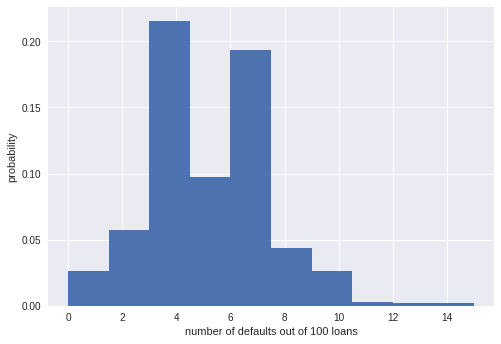

In [0]:
np.random.seed(42)
n_defaults = np.empty(1000)

for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

plt.show()

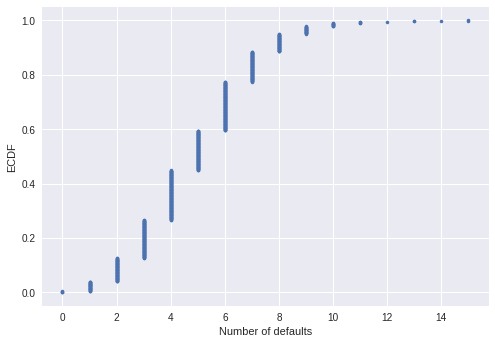

Probability of losing money = 0.022


In [0]:
x, y = ecdf(n_defaults)

plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel("Number of defaults")
plt.ylabel("ECDF")
plt.show()
n_lose_money = sum(n_defaults>=10)

print('Probability of losing money =', n_lose_money / len(n_defaults))

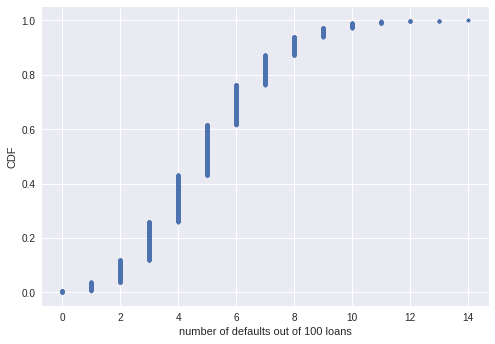

In [0]:
n_defaults = np.random.binomial(n=100, p=0.05, size=10000)
x, y = ecdf(n_defaults)

plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel("number of defaults out of 100 loans")
plt.ylabel("CDF")
plt.show()

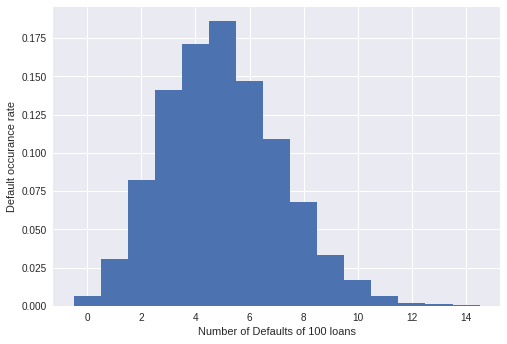

In [0]:
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

plt.hist(n_defaults, bins = bins, normed=True)
plt.xlabel("Number of Defaults of 100 loans")
plt.ylabel("Default occurance rate")

plt.show()

In [0]:
## Poisson Distribution
samples_poisson = np.random.poisson(10, size=10000)

print('Poisson:     ', np.mean(samples_poisson), np.std(samples_poisson))
n, p = [20, 100, 1000], [0.5, 0.1, 0.01]

for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)
    print('n =', n[i], ', Binom:', np.mean(samples_binomial), np.std(samples_binomial))

Poisson:      10.0145 3.1713545607516043
n = 20 , Binom: 10.0592 2.23523944131272
n = 100 , Binom: 10.0441 2.9942536949964675
n = 1000 , Binom: 10.0129 3.139639085946026


In [0]:
##Basket ball no hitters game
n_nohitters = np.random.poisson(251/115, size=10000)
n_large = np.sum(n_nohitters>=7)
p_large = n_large / 10000

print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.0072


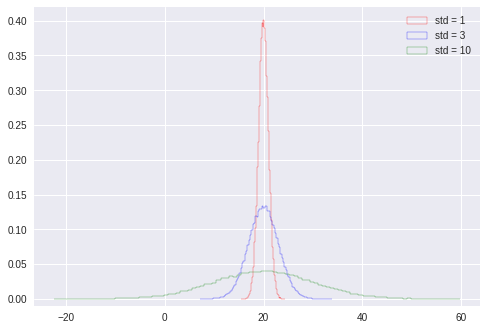

In [0]:
##Probabilistic thinking with Continuous Variables
##Probability Density Functions(PDFs)

##Gaussian/Normal Distributions
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

plt.hist(samples_std1, normed=True, histtype="step", bins=100, color="red")
plt.hist(samples_std3, normed=True, histtype="step", bins=100, color="blue")
plt.hist(samples_std10, normed=True, histtype="step", bins=100, color="green")

_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


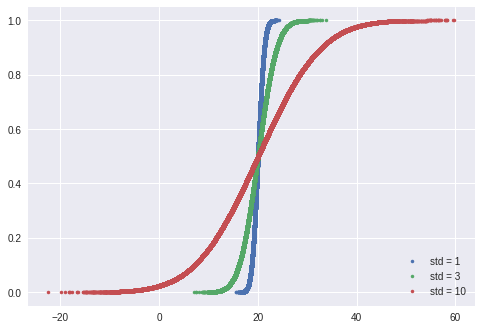

In [0]:
# Generating CDFs
x_std1, y_std1=ecdf(samples_std1) 
x_std3, y_std3=ecdf(samples_std3)
x_std10, y_std10=ecdf(samples_std10)

plt.plot(x_std1, y_std1, marker=".", linestyle="none")
plt.plot(x_std3, y_std3, marker=".", linestyle="none")
plt.plot(x_std10, y_std10, marker=".", linestyle="none")

plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

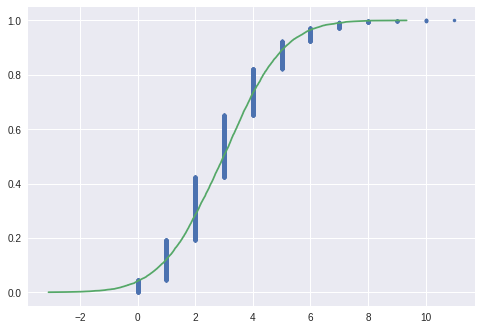

In [0]:
n_defaults = np.random.binomial(60, 0.05, 10000)
x, y = ecdf(n_defaults)

sample_defaults = np.random.normal(np.mean(n_defaults), np.std(n_defaults), size=10000)
x_std, y_std = ecdf(sample_defaults)

plt.plot(x, y, marker=".", linestyle="none")
plt.plot(x_std, y_std)
plt.show()

In [0]:
np.sqrt(28/6)

2.160246899469287

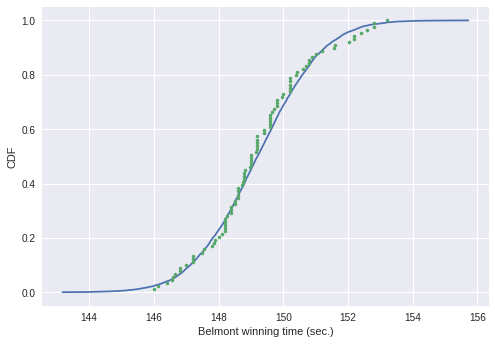

In [0]:
belmont_no_outliers = np.array([148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ])

mu, sigma = np.mean(belmont_no_outliers), np.std(belmont_no_outliers)
samples = np.random.normal(mu, sigma, size=10000)

x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

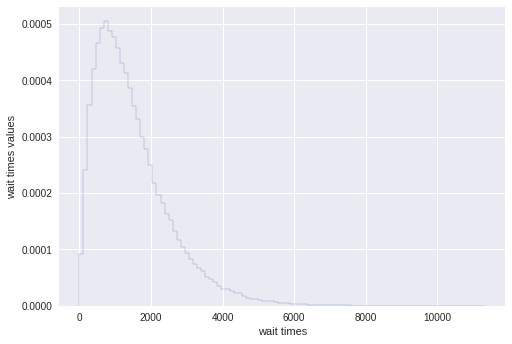

In [0]:
# The Exponential distribution

def successive_poisson(tau1, tau2, size=1):
    t1 = np.random.exponential(tau1, size)
    t2 = np.random.exponential(tau2, size)
    return t1 + t2

waiting_times = successive_poisson(764, 715, 100000)

plt.hist(waiting_times, bins=100, normed=True, histtype='step')
plt.xlabel("wait times")
plt.ylabel("wait times values")
plt.show()